In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

# Classification

   - The classification is the problem of predicting a discrete class label output for an example.
   - The regression is the problem of predicting a continuous quantity output for an example
    
**Function Approximation:** The idea is  developing a model using historical data to make a prediction on new data where we do not have the answer. This is done by approximating a function:    

$$\hat{f}: x(t) \to y(t)$$

$x(t)$ is input data, while $y(t)$ is output data. For classification, $y(t)$ are discrete output variables. For instance, an e-mail can classified as "spam" and "nor-spam"




In [2]:
from IPython.display import Image
Image(filename='imgs/PipelineImage.jpg')

IOError: [Errno 2] No such file or directory: u'imgs/PipelineImage.jpg'

### Some examples...

1. Text categorization (spam filtering)
2. fraud detection
3. Optical character recognition
4. machine vision (face and action recognition)
5. natural-language processing (spoken languaje recognition)
6. market segmentation (predict if customer will respond to a promotion)
7. bioinformatics (classify proteins according their function)


### Go to real-life!

see dataset description at: http://archive.ics.uci.edu/ml/datasets/banknote+authentication

load a dataset

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 



In [3]:
d = pd.read_csv("../data/data_banknote_authentication.txt.gz")
print d.shape
d.head()

(1372, 5)


,varwt,skewt,curwt,entrwt,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


first inspection of data and binary relationships.

- are variables normal?
- what relations do you see?

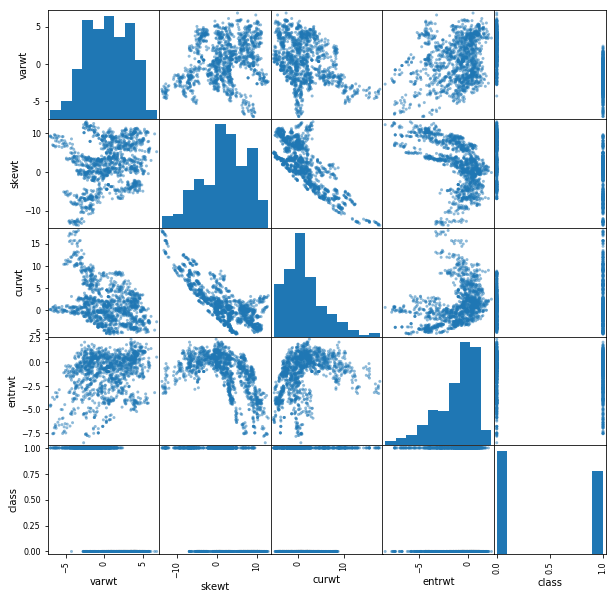

In [4]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

now split data: input columns and colum to be predicted

In [5]:
X = d.values[:,:-1]
y = d.values[:,-1]


now create an estimator, train and predict

### Gaussian Naive Bayes, simple Bayes or independence Bayes.

It is a simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

- An advantage of naive Bayes is that it only requires a small number of training data to estimate the parameters necessary for classification
 
-  A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

- It is not necessary the computation of covariance matrix 

***Despite of the name it is not (necessarily) a Bayesian method***

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()

est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:100]
print "first 100 targets    ", y[:100]


first 100 predictions [ 0.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  1.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  1.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  1.  0.  1.  0.  1.  0.  1.]
first 100 targets     [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


accuracy of predicions

In [7]:
print "%.3f"%accuracy_score(predictions, y)

0.841


but wait! we are cheating!! cannot use same data for training and for test. let's use the first half for training and the rest for test

In [8]:
n = len(X)/2
est.fit(X[:n], y[:n])
print "%.3f"%accuracy_score(est.predict(X[n:]), y[n:])

0.111


what happened?!?!?

In [9]:
print "first 100", y[:100]
print "last  100", y[-100:]
print "class distribution", [(i, sum(y==i)) for i in np.unique(y)]

first 100 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
last  100 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
class distribution [(0.0, 762), (1.0, 610)]


data is not shuffled, we are training only with one class. understand next chart and how it is built

Text(0.5,0,u'n')

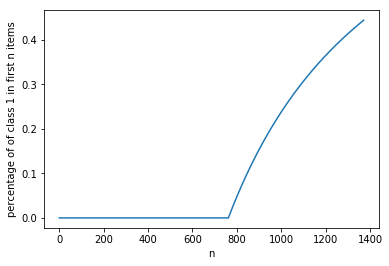

In [10]:
t = range(1,len(y))
p = [np.mean(y[:i]) for i in t]
plt.plot(t,p)
plt.ylabel("percentage of of class 1 in first n items")
plt.xlabel("n")

let's use cross validation and build more confidence in our results

In [11]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print s
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

[ 0.84057971  0.84782609  0.83211679  0.8540146   0.84671533  0.83211679
  0.83211679  0.87591241  0.81751825  0.82481752]
accuracy 0.840 (+/- 0.01585)


let's understand better how this estimator is performing.

- TPR: true positive rate
- TNR: true negative rate

In [12]:
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

In [13]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

tpr 0.792 (+/- 0.02388)
tnr 0.878 (+/- 0.02602)


### Decision Tree classifier

The idea is to create a model that predicts the value of a target variable based on several input variables. The observations about an item is represented in the branches and the conclusions about the item's target value represented in the leaves


- Tree models where the target variable can take a discrete set of values are called **classification trees**
- Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**


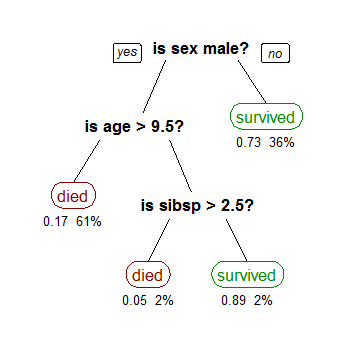

In [15]:
from IPython.display import Image
Image(filename='../imgs/CART_tree_titanic_survivors.png')

we now use other estimators. observe the all follow sklearn API

In [16]:
from sklearn.tree import DecisionTreeClassifier
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.986 (+/- 0.01002)
tpr      0.978 (+/- 0.01321)
tnr      0.987 (+/- 0.01474)


** Many times is useful to know what features are more important to classify! **

In [17]:
est.fit(X,y)
est.feature_importances_

array([ 0.60689247,  0.21528155,  0.15591827,  0.02190771])

### Las Máquinas de soporte vectorial (SVM)

Son una técnica de aprendizaje de máquina utilizado principalmente en problemas de clasificación. Queremos aprender un modelo que nos permita separar dos clases, representados como vectores. 

- Los ejemplos usados para construir las lineas de separación son llamados **vectores de soporte**. Los mas cercanos al hiperplano. 
- El objetivo es **maximizar** el margen del clasificador, descrito entre los **vectores de soporte**
- Ejemplo: 
    - H1 **No** separa las clases
    - H2 las separa con un pequeño margen
    - H3 las separa con el máximo margen
- **Margen**: Máxima distancia entre el hiperplano de separación

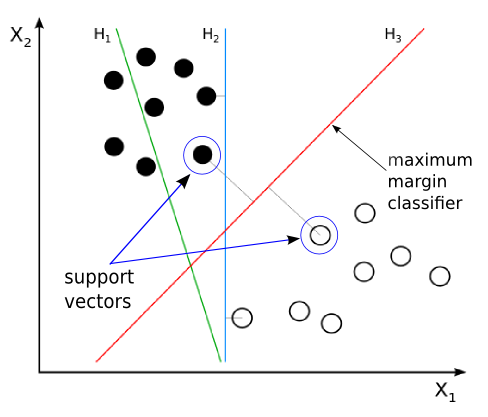

In [19]:
from IPython.display import Image
Image(filename='../imgs/svm_diagram.png', width=400)

In [20]:
X = d.values[:,:-1]
y = d.values[:,-1]

X = d.values[:,:-3]
y = d.values[:,-1]


from sklearn.svm import SVC
est = SVC()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

accuracy 0.937 (+/- 0.02445)
tpr      0.965 (+/- 0.03201)
tnr      0.909 (+/- 0.02494)


# Regression

see dataset description: http://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

In [21]:
d = pd.read_csv("../data/airfoil_self_noise.dat.gz")
print d.shape
d.head()

(1503, 6)


,freq,angle,chord,vel,suc,pres
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


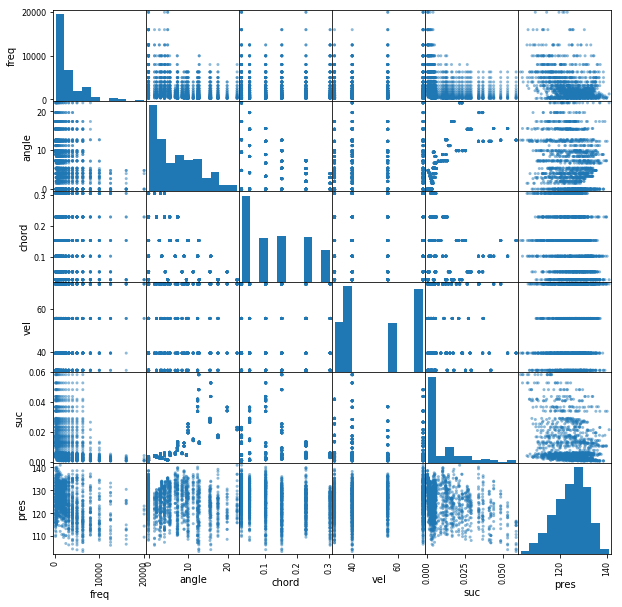

In [22]:
pd.plotting.scatter_matrix(d, figsize=(10,10));

same workflow, observe performance metric must be different for regression. is result acceptable??

In [23]:
X = d.values[:,:-1]
y = d.values[:,-3]X = d.values[:,:-1]
y = d.values[:,-1]
print( X.shape)

#[:,[0,1,2,5,6,7]]
# a[:range(3)+range(4,8)]
X = d.values[:,[0,1,2,4]]
y = d.values[:,-3]

#a = pd.DataFrame(a, columns=["A", "B", "C", "D", "E"])


#...if is a dataframe
# a[[i for i in a.columns if i!="C"]].values

print d.head()
print( X.shape)
print(y.shape)
print type(X)
print X[0][0], X[0][1], X[0][2]


#creAR UN ARRAY

#a = np.random.randint(10, size=(10,5))
#a = pd.DataFrame(a, columns=["A", "B", "C", "D", "E"])
#a[[i for i in a.columns if i!="C"]].values

SyntaxError: invalid syntax (<ipython-input-23-bdb192abb9d9>, line 2)

In [24]:
X = d.values[:,:-1]
y = d.values[:,-1]

In [25]:
from sklearn.tree import DecisionTreeRegressor
est = DecisionTreeRegressor()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 6.157 (+/- 1.60821)


In [26]:
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE 43.001 (+/- 4.13622)


let's see SVR result more in detail. observe that whe training with less data performace drops. will use permutations to take a random half.

In [27]:
n = len(d)/2
est = SVR()
perm = np.random.permutation(len(d))

Xtr, ytr = X[perm[:n]], y[perm[:n]]
Xts, yts = X[perm[n:]], y[perm[n:]]

est.fit(Xtr, ytr)
print "MSE %.3f"% mean_squared_error(yts, est.predict(Xts))

MSE 46.613


Text(0.5,1,u'showing only some random 40 test elements (BLACK line is error)')

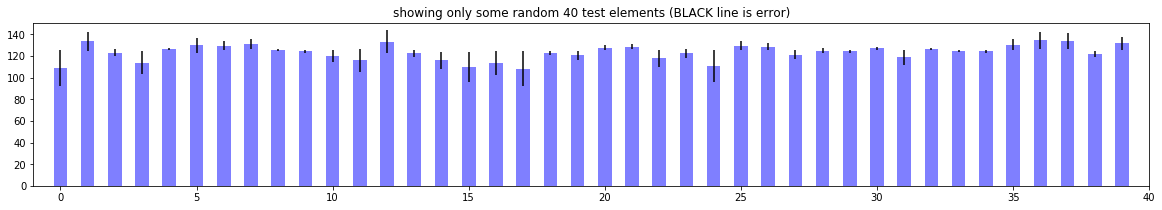

In [28]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

finally, let's see the effect of increasing data

In [29]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 3 4 5 6 7 8 9 10


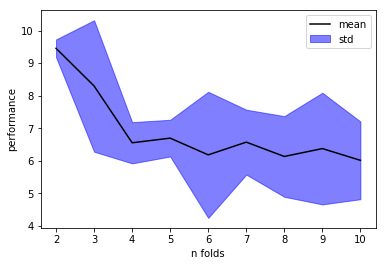

In [30]:
show_curve(DecisionTreeRegressor())

2 3 4 5 6 7 8 9 10


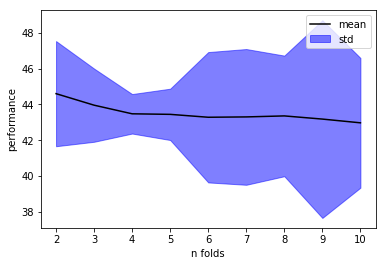

In [31]:
show_curve(SVR())


2 3 4 5 6 7 8 9 10


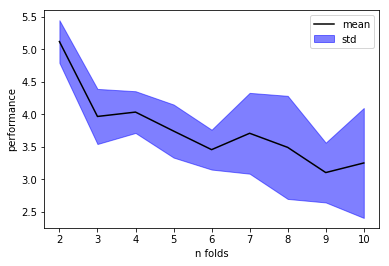

In [32]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())